In [75]:
#导入所需要的库
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [76]:
data = pd.read_csv(r'train.csv')

In [77]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
data.head(10)#展示这个表长什么样子

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [80]:
#筛选特征
data.drop(['Cabin','Name','Ticket'],inplace=True,axis=1)#删除某列,anxis=1对列,=0对行

In [81]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [82]:
#处理缺失值
data['Age'] = data['Age'].fillna(data['Age'].mean())
#增加一些噪声但是没关系，不会对模型造成太大影响

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [84]:
data = data.dropna(axis=0)#删除所有有缺失值的行

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [86]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [87]:
labels=data['Embarked'].unique().tolist()#将某列所有取值都取出
data['Embarked'] = data['Embarked'].apply(lambda  x: labels.index(x))#把列表中所有的项改成索引
#非常聪明转换特征变量的说法

C:\Windows\Temp\ipykernel_8168\1796930657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'] = data['Embarked'].apply(lambda  x: labels.index(x))#把列表中所有的项改成索引


In [88]:
labels.index("S")

0

In [89]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,0
1,2,1,1,female,38.000000,1,0,71.2833,1
2,3,1,3,female,26.000000,0,0,7.9250,0
3,4,1,1,female,35.000000,1,0,53.1000,0
4,5,0,3,male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,0
887,888,1,1,female,19.000000,0,0,30.0000,0
888,889,0,3,female,29.699118,1,2,23.4500,0
889,890,1,1,male,26.000000,0,0,30.0000,1


In [90]:
labels=data['Sex'].unique().tolist()#将某列所有取值都取出
data['Sex'] = data['Sex'].apply(lambda  x: labels.index(x))#把列表中所有的项改成索引
#非常聪明转换特征变量的说法

C:\Windows\Temp\ipykernel_8168\267781549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = data['Sex'].apply(lambda  x: labels.index(x))#把列表中所有的项改成索引


In [91]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,0
1,2,1,1,1,38.000000,1,0,71.2833,1
2,3,1,3,1,26.000000,0,0,7.9250,0
3,4,1,1,1,35.000000,1,0,53.1000,0
4,5,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,0
887,888,1,1,1,19.000000,0,0,30.0000,0
888,889,0,3,1,29.699118,1,2,23.4500,0
889,890,1,1,0,26.000000,0,0,30.0000,1


In [98]:
X = data.iloc[:,data.columns != 'Survived']#取出符合条件的列

In [99]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [100]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.000000,1,0,7.2500,0
1,2,1,1,38.000000,1,0,71.2833,1
2,3,3,1,26.000000,0,0,7.9250,0
3,4,1,1,35.000000,1,0,53.1000,0
4,5,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,0,27.000000,0,0,13.0000,0
887,888,1,1,19.000000,0,0,30.0000,0
888,889,3,1,29.699118,1,2,23.4500,0
889,890,1,0,26.000000,0,0,30.0000,1


In [101]:
y = data.iloc[:,data.columns == 'Survived']

In [102]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)##训练集0.7,测试集0.3

In [115]:
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
802,803,1,0,11.000000,1,2,120.0000,0
83,84,1,0,28.000000,0,0,47.1000,0
628,629,3,0,26.000000,0,0,7.8958,0
471,472,3,0,38.000000,0,0,8.6625,0
812,813,2,0,35.000000,0,0,10.5000,0
...,...,...,...,...,...,...,...,...
841,842,2,0,16.000000,0,0,10.5000,0
375,376,1,1,29.699118,1,0,82.1708,1
460,461,1,0,48.000000,0,0,26.5500,0
401,402,3,0,26.000000,0,0,8.0500,0


In [116]:
for i in [Xtrain, Xtest, Ytrain ,Ytest]:
    i.index = range(i.shape[0])            #索引重新排序，纠正索引非常必要，避免在之后的代码中出现混乱

In [117]:
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,803,1,0,11.000000,1,2,120.0000,0
1,84,1,0,28.000000,0,0,47.1000,0
2,629,3,0,26.000000,0,0,7.8958,0
3,472,3,0,38.000000,0,0,8.6625,0
4,813,2,0,35.000000,0,0,10.5000,0
...,...,...,...,...,...,...,...,...
617,842,2,0,16.000000,0,0,10.5000,0
618,376,1,1,29.699118,1,0,82.1708,1
619,461,1,0,48.000000,0,0,26.5500,0
620,402,3,0,26.000000,0,0,8.0500,0


In [118]:
#Ytest.reset_index(drop=True,inplace=True)  #索引重新排序的另外一种方法

In [119]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)

score

0.7303370786516854

In [120]:
#交叉验证
clf = DecisionTreeClassifier(random_state=25)
score = cross_val_score(clf,x,y,cv=10).mean()

score

0.7503447395301327

0.8166624106230849


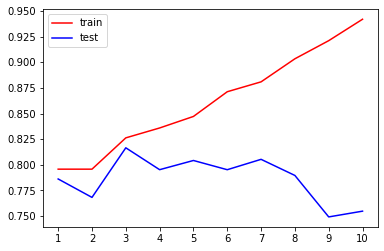

In [122]:
import matplotlib.pyplot as plt
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                ,max_depth=i+1
                                ,criterion = 'entropy'
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain, Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
    
print(max(te))
plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [124]:
#网格搜索：能够帮助我们同时调整多个参数的技术，枚举技术。缺点：由于一个一个试，
#所以非常耗时间，需要清除参数在某个范围内
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)#0-0.5之间有顺序的排列数（随机的）
#entropy_thresholds = np.linspace(0,1,50)

#parameters本质是一串参数和这些参数对应的，我们希望网格搜索来搜索参数的取值范围
parameters = {'criterion':('gini','entropy')
              ,'splitter':('best','random')
              ,'max_depth':[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_impurity_decrease':np.linspace(0,0.5,20)
    
}


clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS = GS.fit(Xtrain, Ytrain)
#网格搜索不一定调的高，网格搜索真的很慢，参数要想好了

In [125]:
GS.best_params_ #从我们输入的参数和参数取值的列表中，返回最佳组合

{'criterion': 'entropy',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [126]:
GS.best_score_ #网格搜索后的模型的评判标准

0.8279569892473118

In [161]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#建立决策树模型
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
clf = DecisionTreeClassifier(criterion = "entropy"
                                 ,random_state=30
                                 ,splitter='best'
                                 ,max_depth=4
                                 ,min_samples_leaf=6#用来限制叶子结点的重要性参数
                                # ,min_samples_split=10#一个节点至少包含这么多的训练样本，这个节点才允许被分枝
                                # ,max_features=6 #限制分枝时考虑的特征个数，超过限制个数的特征都会舍弃，
                                                #强行设定此参数可能会导致模型学习不足
                                ,min_impurity_decrease=0#限制信息增益（父节点和子节点之间的差值）大小，信息增益小于设定数值的分枝不会发生
                                  
                                 )#实例化，使用交叉熵,控制随机性,rs可以随便选
clf = clf.fit(Xtrain, Ytrain)                                
score = clf.score(Xtest, Ytest)#返回预测的准确度度accurancy
score

0.8202247191011236

In [172]:
feature_name = ["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
import pydotplus
import graphviz
dot_data = tree.export_graphviz(clf#实例化特征
                                ,feature_names = feature_name
                                ,class_names=["Dead","Survived"]#逗号写在前面，方便注解
                                ,filled=True #是否填充颜色，颜色越深表示不纯度越高  ！！！需要理解决策树原理
                                ,rounded=True #框有角，框的形状
)
#graph = graphviz.Source(dot_data)
graph = pydotplus.graph_from_dot_data(dot_data)
graph
#不纯度为0时可以产生标签类别，树变宽，因为随机性增加

In [173]:
graph.write_pdf("tree1.pdf")#决策树输出为PDF

True

In [174]:
clf.feature_importances_#使用那些特征，特征的重要性

array([0.05277222, 0.23165281, 0.52198835, 0.10733872, 0.0416383 ,
       0.        , 0.0446096 , 0.        ])

In [175]:
[*zip(feature_name,clf.feature_importances_)]
#根节点对于决策树的贡献永远是最高的

[('PassengerId', 0.05277222177452375),
 ('Pclass', 0.23165281408178445),
 ('Sex', 0.5219883461162808),
 ('Age', 0.10733872373206595),
 ('SibSp', 0.04163829770609852),
 ('Parch', 0.0),
 ('Fare', 0.044609596589246514),
 ('Embarked', 0.0)]